In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'November 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-11-30      -97   -335         -4 -24   0    -6      1     -10       1

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

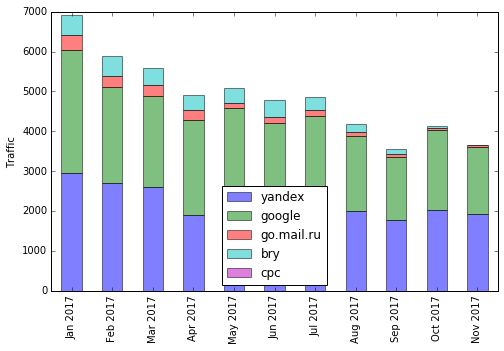

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

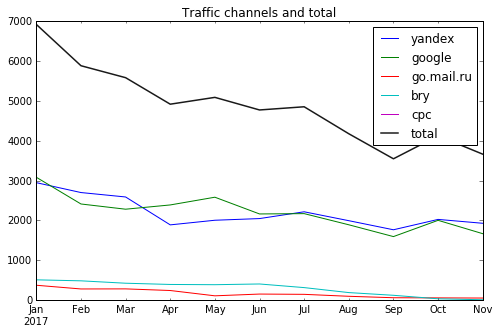

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                          межкомнатные двери недорого      1
           1                                               скидки      1
           2                                складные двери книжка      1
go.mail.ru 0                                            (not set)     54
google     0                            np - /?cnt=catalog&r=2438    214
           1                                               np - /    157
           2                                        полотно двери    119
           3                            np - /?cnt=catalog&r=1428    116
           4                                     np - /?pid=pokaz     64
           5                            np - /?cnt=catalog&r=1010     11
           6                                 np - /?pid=pricelist      7
           7                            np - /?cnt=catalog&r=3124      6
           8                              np - /?pid=menu-katalog      6
           9                             np - /?cnt=catalog&r=405      5
           10                            np - /?cnt=catalog&r=999      5
           11                                  np - /?pid=contact      5
           12                                       двери полотно      5
           13                                     полотна дверные      5
           14                           np - /?cnt=catalog&r=1260      4
           15                           np - /?cnt=catalog&r=1792      4
           16                             np - /?cnt=catalog&r=57      4
           17                                   полотно для двери      4
           18                           np - /?cnt=catalog&r=2519      3
           19                                 np - /?pid=dostavka      3
           20                                      np - /?pid=faq      3
           21                                     полотно дверное      3
           22                           np - /?cnt=catalog&r=1404      2
           23                            np - /?cnt=catalog&r=151      2
           24                            np - /?cnt=catalog&r=155      2
           25                           np - /?cnt=catalog&r=2553      2
...                                                           ...    ...
yandex     699        стекломагниевые заполнение дверного полотна      1
           700                         стеклянная дверь для кухни      2
           701                          стеклянная дверь на кухню      1
           702                       стеклянное полотно для двери      1
           703                    стенки в дверных проемах купить      1
           704                           стоимость двери на кухню      1
           705                           толщина дверного полотна      1
           706  толщина дверного полотна межкомнатной двери ра...      1
           707                       толщина полотна 110 мм дверь      1
           708                              толщина полотна двери      1
           709               толщина полотна двери 900 мм и более      1
           710                   толщина полотна деревянной двери      1
           711    тонкое и легкое дверное полотно купить в москве      1
           712                              узкие дверные полотна      1
           713                        узкие дверные полотна 40 см      1
           714                              узкое дверное полотно      1
           715                     узнать размер дверного полотна      1
           716            ульяновские межкомнатные двери на кухню      1
           717               установка дверного короба с полотном      1
           718                фальш дверь полотно 800х2000 купить      1
           719  филенчатое дверное полотно из массива сосны вы...      1
           720  фото замок на раздвижную дверь врезной аксессу...      1
           721              фурнитура для кухни двери полукруглые      1
           722  фурнитура для складных двер

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,межкомнатные двери недорого,1
go.mail.ru,(not set),54
google,np - /?cnt=catalog&r=2438,214
rambler,верда модель джаз эмаль белая,5
yahoo,np - /,1
yandex,(not set),917


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                        межкомнатные двери недорого      1
           1                                             скидки      1
           2                              складные двери книжка      1
go.mail.ru 0                                          (not set)     54
google     0                          np - /?cnt=catalog&r=2438    214
           1                                             np - /    157
           2                                      полотно двери    119
           3                          np - /?cnt=catalog&r=1428    116
           4                                   np - /?pid=pokaz     64
rambler    0                      верда модель джаз эмаль белая      5
           1                            дверь гармошка недорого      1
           2    межкомнатные двери ламинированные эконом класса      1
yahoo      0                                             np - /      1
yandex     0                                          (not set)    917
           1                                       took-took.ru      4
           2    межкомнатные двери недорого с установкой москва      3
           3  межкомнатные двери недорого с установкой под ключ      3
           4                                              двери      2